# Imersão Dados_Phyton - Alura
### Desafio da Aula 03
Por: João Paulo Costa

Desafio:
Criar um grafico interativo da biblioteca `plotly`, que traga uma visualização dos dados referentes ao salario medio por pais do cargo de cientista de Dados

*Comentario: Decidi fazer uso da base de dados original, para exercitar o tratamento de dados desde o inicio*

### 1- Carregamento dos dados

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


### 2 - Tratamento dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [4]:
df.isnull().sum()

work_year             10
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd          0
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

In [5]:
# Traduzindo as colunas para português brasileiro para melhor entendimento
df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}, inplace=True)

# Exibindo as colunas traduzidas
print(df.columns)

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [6]:
#Descartando as linhas da base de dados com dados faltantes, já é um valor infimo
df_limpo = df.dropna()

In [7]:
#Convertendo a coluna 'ano' para 'Int', que se encontrava em 'Float'
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('Int64'))

In [8]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  Int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  int64 
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: Int64(1), int64(3), object(7)
memory usage: 12.3+ MB


In [9]:
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [10]:
df_limpo.head(10)

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


### 3-Visualisação dos dados

In [11]:
# Filtrando os cargos apenas para "Data Scientist"
df_cientista_dados = df_limpo[df_limpo['cargo'] == 'Data Scientist']
df_cientista_dados.head(10)

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
6,2025,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M
65,2025,SE,FT,Data Scientist,258000,USD,258000,US,0,US,M
66,2025,SE,FT,Data Scientist,119800,USD,119800,US,0,US,M
73,2025,SE,FT,Data Scientist,175074,USD,175074,US,0,US,M
74,2025,SE,FT,Data Scientist,79560,USD,79560,US,0,US,M
131,2025,MI,FT,Data Scientist,117000,USD,117000,US,0,US,M
132,2025,MI,FT,Data Scientist,90000,USD,90000,US,0,US,M


In [12]:
# Agrupando por país e calcular salário médio em dólar
salario_medio_por_pais = (
    df_cientista_dados
    .groupby('residencia')['usd']
    .mean()
    .round(2) #arredondando para duas casas decimais
    .reset_index()
    .rename(columns={'residencia': 'País', 'usd': 'Salário Médio (USD)'})
    .sort_values(by='Salário Médio (USD)', ascending=False)
)
salario_medio_por_pais.head(10)

,País,Salário Médio (USD)
51,US,162802.49
45,SG,152522.71
5,BG,152500.00
8,CH,152256.67
16,EG,140690.91
7,CA,140519.98
32,MX,140466.67
36,NZ,122929.75
27,JP,121766.67
3,AU,112190.00


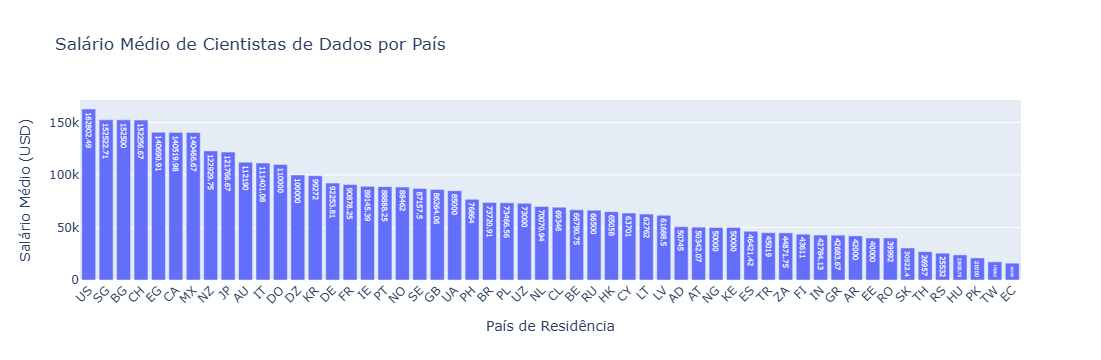

In [14]:
# Gerando o gráfico interativo de barras
fig = px.bar(
    salario_medio_por_pais,
    x='País',
    y='Salário Médio (USD)',
    title='Salário Médio de Cientistas de Dados por País',
    labels={'País': 'País de Residência', 'Salário Médio (USD)': 'Salário Médio (USD)'},
    text='Salário Médio (USD)'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

### 4 - Conclusão

A partir da visualização dos dados apresentados no gráfico acima, podemos concluir que o país com maior média salarial para Cientistas de Dados é o Estados Unidos (US), e o país com a menos média salarial para o mesmo cargo é o Equador (EC).